In [ ]:
from  google.colab import drive  
drive.mount('/content/drive')
%cd /content/drive/My\ Drive/econ4130

Mounted at /content/drive
/content/drive/My Drive/econ4130


In [ ]:
### save and load data using pickle
import pickle
def psave(dataframe, fname):
    with open('{}.pkl'.format(fname),'wb') as pickle_file:
        pickle.dump(dataframe,pickle_file)
        
def pload(fname):
    with open('{}.pkl'.format(fname),'rb') as pickle_file:
        dataframe=pickle.load(pickle_file)
        return dataframe

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
!pip install selenium
!apt-get update 
!apt install chromium-chromedriver

from selenium import webdriver
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')
wd = webdriver.Chrome('chromedriver',chrome_options=chrome_options)
driver =webdriver.Chrome('chromedriver',chrome_options=chrome_options)

     |████████████████████████████████| 911kB 9.4MB/s 
Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:3 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:4 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:5 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Ign:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [697 B]
Hit:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:9 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [836 B]
Get:10 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:11 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ P

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: use options instead of chrome_options
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: use options instead of chrome_options
  # This is added back by InteractiveShellApp.init_path()


In [ ]:
###scrap US bond yield data from 1999 to 2020 using BeautifulSoup
import requests
from bs4 import BeautifulSoup
import re
def get_rates(url):
  page = requests.get(url)
  soup = BeautifulSoup(page.content,'html.parser')
  yield_rates = soup.find_all('td',class_='text_view_data')
  i=0
  for rate in yield_rates:
    if i%13==0 and rate.text[6]=='9':
      dates.append('19'+rate.text[6:]+'-'+rate.text[:2]+'-'+rate.text[3:5])
    elif i%13==0 and rate.text[6]!='9':
      dates.append('20'+rate.text[6:]+'-'+rate.text[:2]+'-'+rate.text[3:5])
    else:
      try:
        M[(i%13)-1].append(float(rate.text))
      except:
        M[(i%13)-1].append(np.nan)
    i+=1


In [ ]:
url='https://www.treasury.gov/resource-center/data-chart-center/interest-rates/Pages/TextView.aspx?data=yieldYear&year='
years=[i for i in range(1999,2021)]
M=[[],[],[],[],[],[],[],[],[],[],[],[]]
dates=[]

for year in years:
  url1=url+str(year)
  get_rates(url1)
 

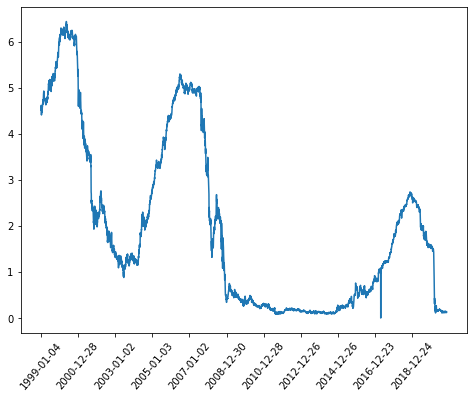

              1M    2M    3M    6M    1Y  ...    5Y    7Y   10Y   20Y   30Y
1999-01-04   NaN   NaN  4.49  4.57  4.58  ...  4.57  4.75  4.69  5.42  5.15
1999-01-05   NaN   NaN  4.48  4.57  4.56  ...  4.62  4.80  4.74  5.48  5.21
1999-01-06   NaN   NaN  4.47  4.55  4.53  ...  4.61  4.76  4.73  5.42  5.17
1999-01-07   NaN   NaN  4.44  4.49  4.51  ...  4.62  4.82  4.77  5.48  5.23
1999-01-08   NaN   NaN  4.48  4.53  4.57  ...  4.72  4.92  4.86  5.57  5.26
...          ...   ...   ...   ...   ...  ...   ...   ...   ...   ...   ...
2020-10-26  0.08  0.09  0.11  0.12  0.12  ...  0.35  0.58  0.81  1.37  1.59
2020-10-27  0.08  0.09  0.10  0.11  0.12  ...  0.34  0.56  0.79  1.34  1.57
2020-10-28  0.07  0.09  0.10  0.11  0.12  ...  0.34  0.56  0.79  1.34  1.56
2020-10-29  0.08  0.10  0.09  0.10  0.12  ...  0.38  0.61  0.85  1.39  1.62
2020-10-30  0.08  0.09  0.09  0.11  0.13  ...  0.38  0.64  0.88  1.43  1.65

[5465 rows x 12 columns]


In [ ]:
columns=['1M','2M','3M','6M','1Y','2Y','3Y','5Y','7Y','10Y','20Y','30Y']
DICT={}
for i in range(12):
  DICT[columns[i]]=M[i]
df=pd.DataFrame(DICT,index=dates)
import matplotlib.pyplot as plt
plt.figure( figsize=(8, 6))
plt.plot(dates,df['1Y'])
plt.xticks([dates[i] for i in range(0,len(dates),500)],rotation=50)
plt.show()
print(df)

In [ ]:
##check for invald rows (where data are 0)
for row in range(df['1Y'].shape[0]): # df is the DataFrame
             if df['1Y'].iloc[row] == 0:
                 print(row)


4576


In [ ]:
print(df.iloc[4576])
print(dates[4576])


1M     0.0
2M     NaN
3M     0.0
6M     0.0
1Y     0.0
2Y     0.0
3Y     0.0
5Y     0.0
7Y     0.0
10Y    0.0
20Y    0.0
30Y    0.0
Name: 2017-04-14, dtype: float64
2017-04-14


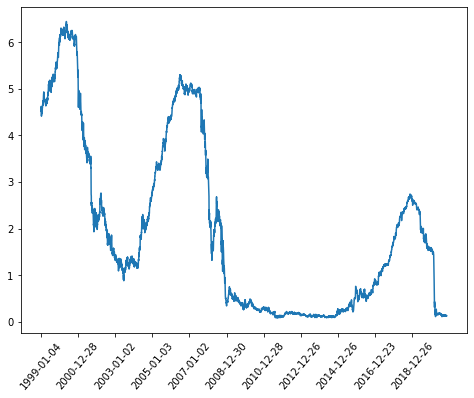

              1M    2M    3M    6M    1Y  ...    5Y    7Y   10Y   20Y   30Y
1999-01-04   NaN   NaN  4.49  4.57  4.58  ...  4.57  4.75  4.69  5.42  5.15
1999-01-05   NaN   NaN  4.48  4.57  4.56  ...  4.62  4.80  4.74  5.48  5.21
1999-01-06   NaN   NaN  4.47  4.55  4.53  ...  4.61  4.76  4.73  5.42  5.17
1999-01-07   NaN   NaN  4.44  4.49  4.51  ...  4.62  4.82  4.77  5.48  5.23
1999-01-08   NaN   NaN  4.48  4.53  4.57  ...  4.72  4.92  4.86  5.57  5.26
...          ...   ...   ...   ...   ...  ...   ...   ...   ...   ...   ...
2020-10-26  0.08  0.09  0.11  0.12  0.12  ...  0.35  0.58  0.81  1.37  1.59
2020-10-27  0.08  0.09  0.10  0.11  0.12  ...  0.34  0.56  0.79  1.34  1.57
2020-10-28  0.07  0.09  0.10  0.11  0.12  ...  0.34  0.56  0.79  1.34  1.56
2020-10-29  0.08  0.10  0.09  0.10  0.12  ...  0.38  0.61  0.85  1.39  1.62
2020-10-30  0.08  0.09  0.09  0.11  0.13  ...  0.38  0.64  0.88  1.43  1.65

[5464 rows x 12 columns]


In [ ]:
del dates[4576]
df1=df.drop(index='2017-04-14')
plt.figure( figsize=(8, 6))
plt.plot(dates,df1['1Y'])
plt.xticks([dates[i] for i in range(0,len(dates),500)],rotation=50)
plt.show()
print(df1)

In [ ]:
#save data to pickle file
psave(df1,'DV_FROM19999TO2020')


<Figure size 432x288 with 0 Axes>

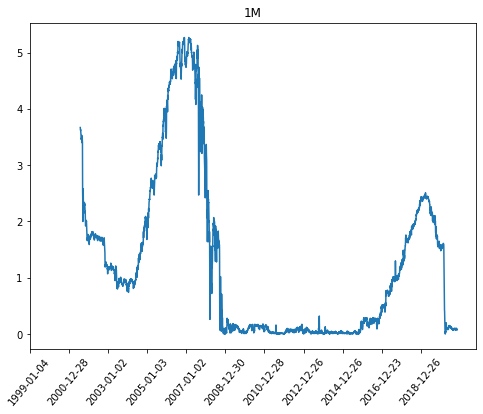

<Figure size 432x288 with 0 Axes>

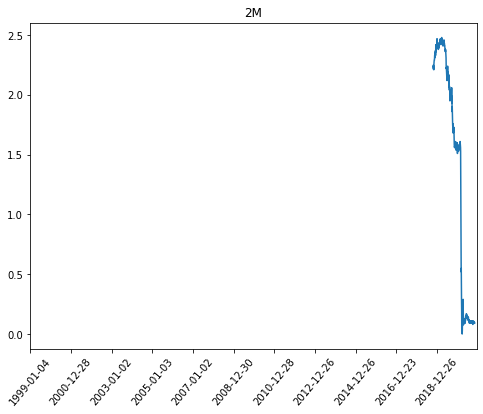

<Figure size 432x288 with 0 Axes>

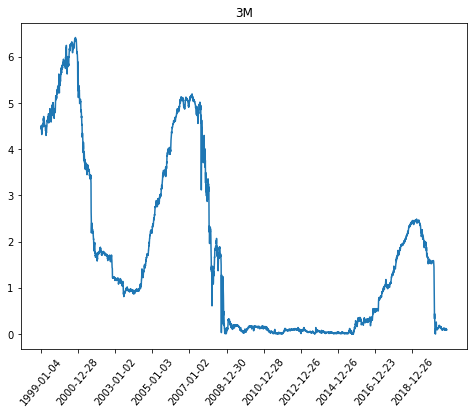

<Figure size 432x288 with 0 Axes>

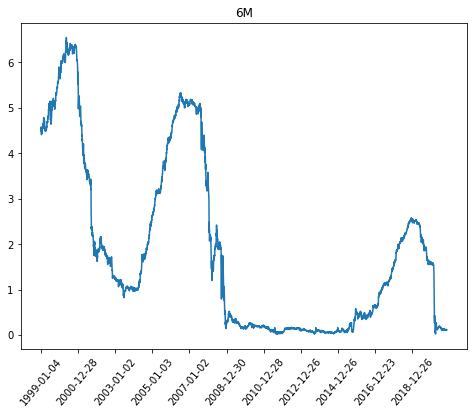

<Figure size 432x288 with 0 Axes>

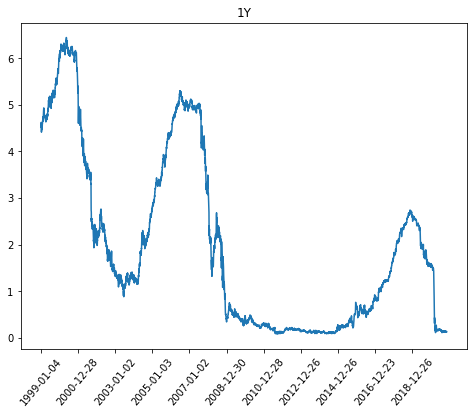

<Figure size 432x288 with 0 Axes>

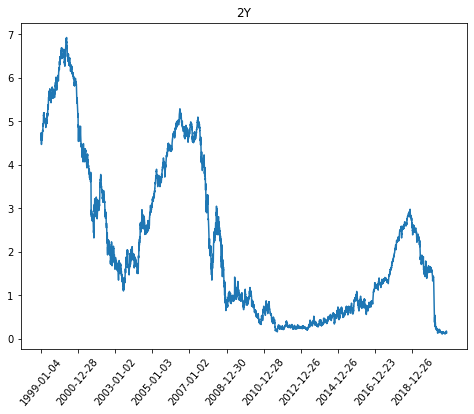

<Figure size 432x288 with 0 Axes>

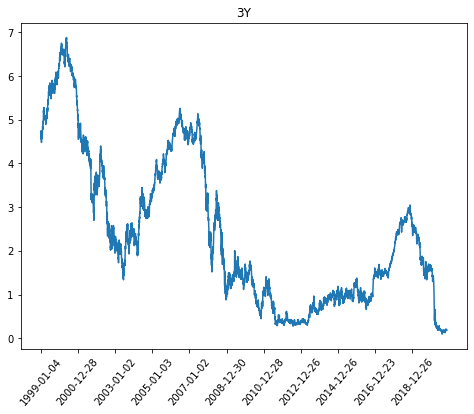

<Figure size 432x288 with 0 Axes>

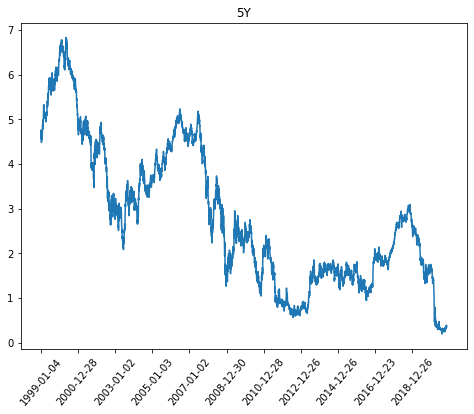

<Figure size 432x288 with 0 Axes>

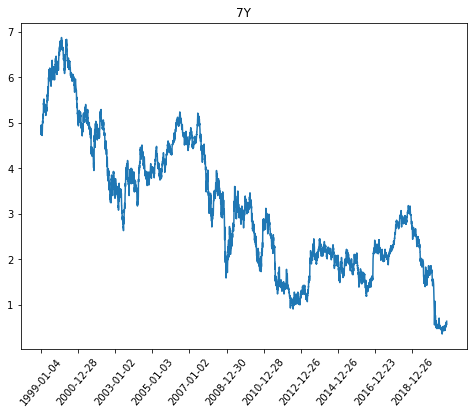

<Figure size 432x288 with 0 Axes>

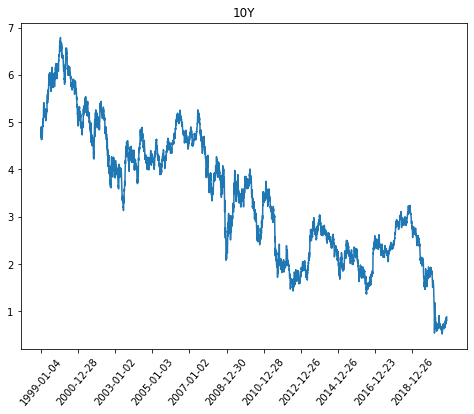

<Figure size 432x288 with 0 Axes>

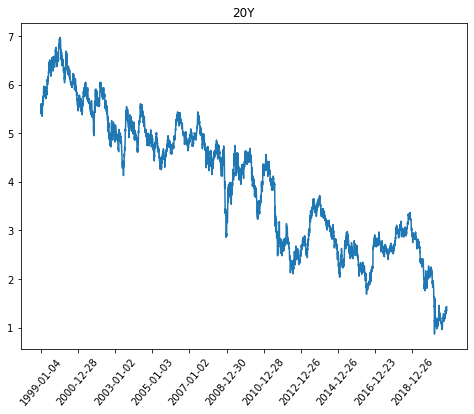

<Figure size 432x288 with 0 Axes>

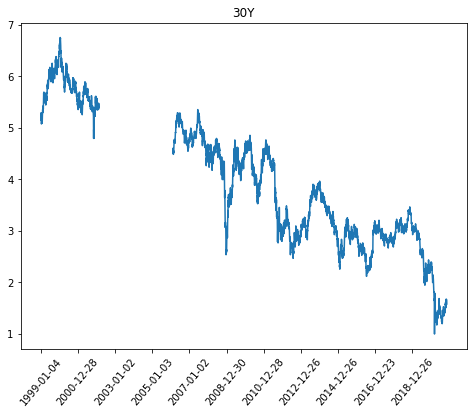

In [ ]:
###visualize all data scraped
import matplotlib.pyplot as plt
def plot(i,l):
  plt.figure(i)
  plt.figure( figsize=(8, 6))
  plt.plot(dates,pload('DV_FROM19999TO2020')[l])
  plt.xticks([dates[i] for i in range(0,len(dates),500)],rotation=50)
  plt.title(l)
  plt.show()
  i+=1
  return i

i=0
for l in columns:
  t=plot(i,l)

In [ ]:
d={}

In [ ]:
import pandas_datareader as web
import datetime
# import data from web using pandas_datareader
names= ['DGS3MO','DGS6MO','DGS1','DGS3','DGS5','DGS7','DGS10','DGS20','DGS1MO','DGS30']
import datetime

start = datetime.datetime(1999, 1, 1)



data=web.DataReader(names, 'fred', start)

import matplotlib.pyplot as plt
def plot1(i,l):
  plt.figure(i)
  plt.figure( figsize=(8, 6))
  plt.plot(df1.index,df1[l])
  plt.xticks([df1.index for i in range(0,len(df1.index),500)],rotation=50)
  plt.title(l)
  plt.show()
  i+=1
  return i



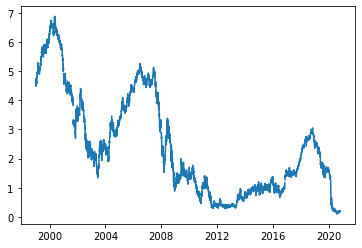

In [ ]:
data
plt.plot(data.index,data['DGS3'])

In [ ]:
###merge to dataframe according to date time
import pandas as pd
df=pload('DV_FROM19999TO2020')
df1=pd.merge(df,data,how='left',left_index=True,right_index=True)

